# Project 3 : Web APIs & NLP

## 2. Data Cleaning, EDA, and Preprocessing

In [2]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
# read in data and display top 5 rows
data = pd.read_csv('data/subreddit_data.csv')
data.head()

,title,subreddit
0,*PLEASE WATCH THE NEW SERIES I PUT UP ON YOUTU...,DCcomics
1,Martian manhunter movie?,DCcomics
2,Concerned is an understatement,DCcomics
3,My witty wife has solved The Batman’s ultimate...,DCcomics
4,Who's more powerful ? Chaos lord or Emotional ...,DCcomics


In [4]:
# take a look at tail
data.tail()

,title,subreddit
19992,|| Captain Marvel-MARVEL Future Revolution || ...,Marvel
19993,"GALACTUS, THE DEVOURER OF WORLDS by Jack Kirby...",Marvel
19994,Marvel Class Homework Help?,Marvel
19995,Marvel Class Homework Help?,Marvel
19996,[OC] Went on a bit of a bad guy binge. More Ma...,Marvel


In [5]:
# create a new column that contains the length of each submission
data['title_length']= data['title'].str.len()

# create a new column that contains the number of words in each submission
data['title_word_count'] = data['title'].str.split().str.len()

In [7]:
# look at the stats
data.describe()

,title_length,title_word_count
count,19997.000000,19997.000000
mean,62.646897,10.988198
std,45.828928,8.333388
min,1.000000,1.000000
25%,33.000000,6.000000
50%,51.000000,9.000000
75%,78.000000,14.000000
max,304.000000,63.000000


In [8]:
# Create a dataframe for each subreddit
dc = data[data['subreddit'] == 'DCcomics']
marvel = data[data['subreddit'] == 'Marvel']

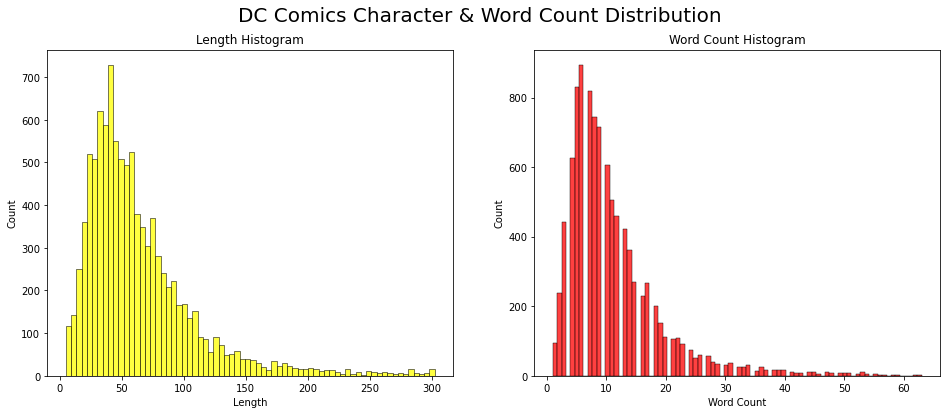

In [9]:
# Plot the word counts of each subreddit
# DC comics
fig, ax = plt.subplots(1, 2, figsize= (16,6))

sns.histplot(dc['title_length'], color= 'Yellow', ax=ax[0])
sns.histplot(dc['title_word_count'], color= 'Red', ax=ax[1])
ax[0].set(xlabel="Length", ylabel='Count', title='Length Histogram')
ax[1].set(xlabel="Word Count", ylabel='Count', title='Word Count Histogram')

fig.suptitle('DC Comics Character & Word Count Distribution', fontsize=20);
plt.savefig('graphs/dc_comics_wc.png')

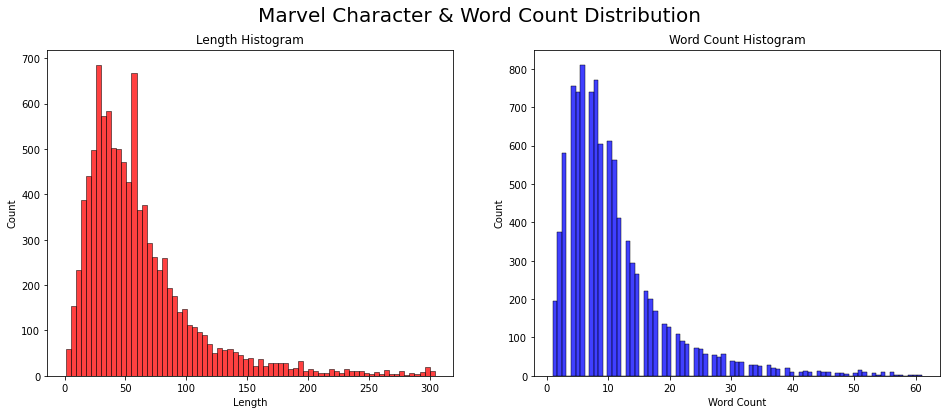

In [10]:
# Marvel
fig, ax = plt.subplots(1, 2, figsize= (16,6))

sns.histplot(marvel['title_length'], color= 'Red', ax=ax[0])
sns.histplot(marvel['title_word_count'], color= 'Blue', ax=ax[1])
ax[0].set(xlabel="Length", ylabel='Count', title='Length Histogram')
ax[1].set(xlabel="Word Count", ylabel='Count', title='Word Count Histogram')

fig.suptitle('Marvel Character & Word Count Distribution', fontsize=20);
plt.savefig('graphs/marvel_wc.png')

In [11]:
# Vectorize DC comics data
cv = CountVectorizer()
dc_cv = cv.fit_transform(dc['title'])
dc_cv_df = pd.DataFrame(dc_cv.todense(), columns = cv.get_feature_names_out())

# Vectorize Marvel data
marvel_cv = cv.fit_transform(marvel['title'])
marvel_cv_df = pd.DataFrame(marvel_cv.todense(), columns = cv.get_feature_names_out())

,00,000,007,01,040,08,10,100,1000,1000th,...,zurser,čižmešija,šejić,سوپر,فلش,گرل,克隆子,𝐁𝐋𝐀𝐂𝐊,𝐅𝐑𝐈𝐃𝐀𝐘,𝙱𝚘𝚘𝚝𝚒𝚎𝚜
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


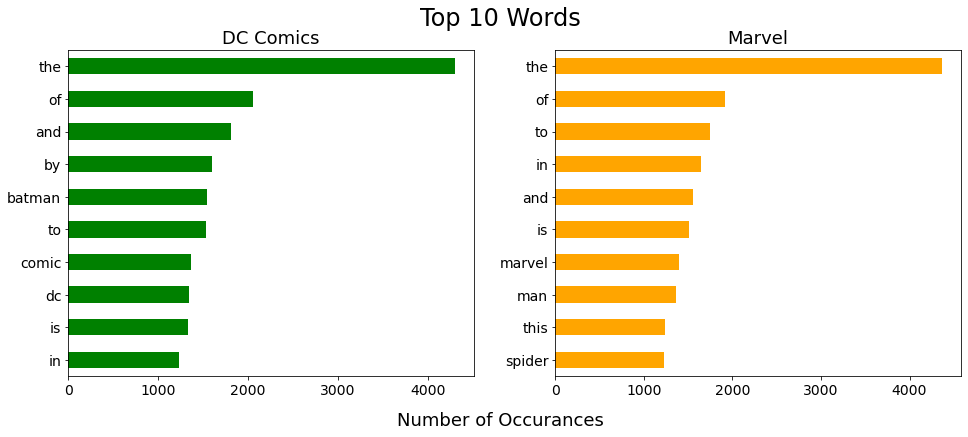

In [13]:
# plot the Most Frequently Occurring Words by subreddit
fig, ax = plt.subplots(1, 2, figsize=(16,6))
dc_cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'Green', ax=ax[0], fontsize=14)
marvel_cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'Orange', ax=ax[1], fontsize=14)

ax[0].set_title('DC Comics', fontsize=18)
ax[1].set_title('Marvel', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.01, 'Number of Occurances', 
         ha='center', fontsize=18);
plt.savefig('graphs/top_10_words.png')

In [14]:
# Vectorize and plot but using 'english' stopwords
cv = CountVectorizer(stop_words='english')
dc_cv = cv.fit_transform(dc['title'])
dc_cv_df = pd.DataFrame(dc_cv.todense(), columns=cv.get_feature_names_out())

marvel_cv = cv.fit_transform(marvel['title'])
marvel_cv_df = pd.DataFrame(marvel_cv.todense(), columns=cv.get_feature_names_out())

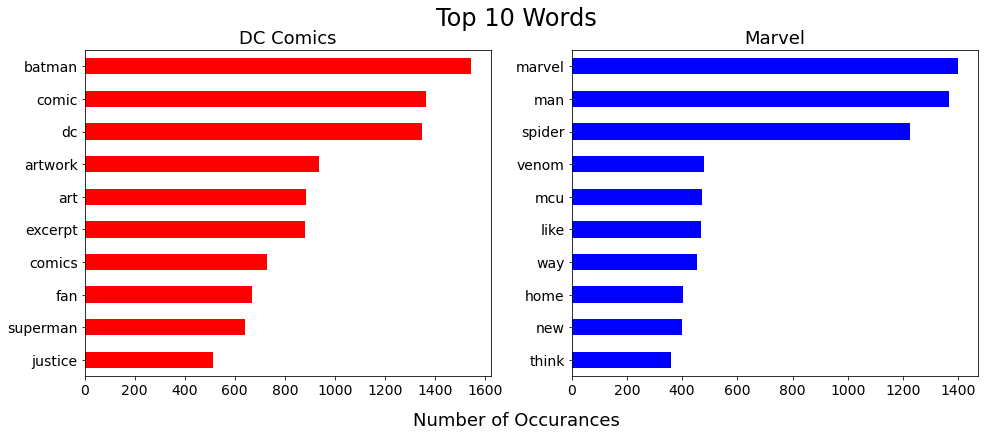

In [15]:
# plot the Most Frequently Occurring Words by subreddit
fig, ax = plt.subplots(1, 2, figsize=(16,6))
dc_cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'Red', ax=ax[0], fontsize=14)
marvel_cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'Blue', ax=ax[1], fontsize=14)

ax[0].set_title('DC Comics', fontsize=18)
ax[1].set_title('Marvel', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.01, 'Number of Occurances', 
         ha='center', fontsize=18);
plt.savefig('graphs/top_10.png')

In [16]:
# Vectorize and plot but using 'english' stopwords and bigrams
cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
dc_cv = cv.fit_transform(dc['title'])
dc_cv_df = pd.DataFrame(dc_cv.todense(), columns=cv.get_feature_names_out())

marvel_cv = cv.fit_transform(marvel['title'])
marvel_cv_df = pd.DataFrame(marvel_cv.todense(), columns=cv.get_feature_names_out())

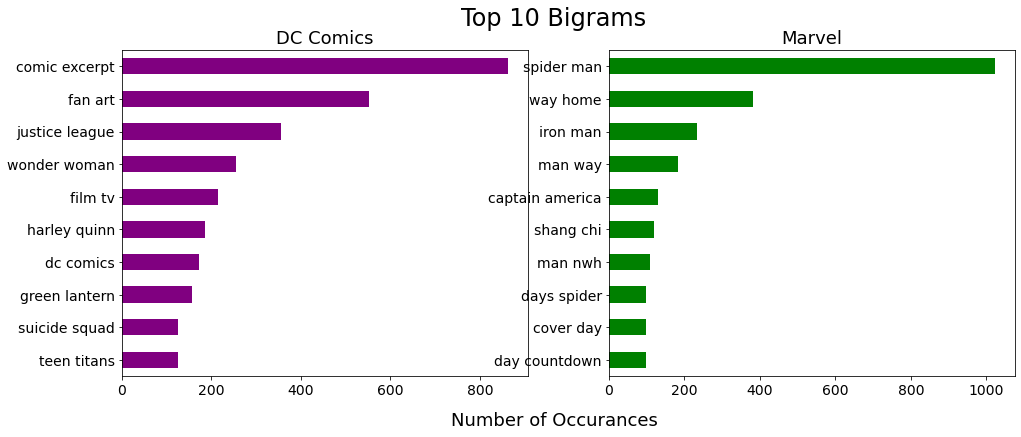

In [17]:
# plot the Most Frequently Occurring Words by subreddit
fig, ax = plt.subplots(1, 2, figsize=(16,6))
dc_cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'Purple', ax=ax[0], fontsize=14)
marvel_cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'Green', ax=ax[1], fontsize=14)

ax[0].set_title('DC Comics', fontsize=18)
ax[1].set_title('Marvel', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Bigrams', fontsize=24)
fig.text(0.5, 0.01, 'Number of Occurances', 
         ha='center', fontsize=18);
plt.savefig('graphs/top_10_phrase.png')

In [42]:
# Vectorize and plot but using 'english' stopwords and bigrams
cv = CountVectorizer(stop_words='english', ngram_range=(3,3))
dc_cv = cv.fit_transform(dc['title'])
dc_cv_df = pd.DataFrame(dc_cv.todense(), columns=cv.get_feature_names_out())

marvel_cv = cv.fit_transform(marvel['title'])
marvel_cv_df = pd.DataFrame(marvel_cv.todense(), columns=cv.get_feature_names_out())

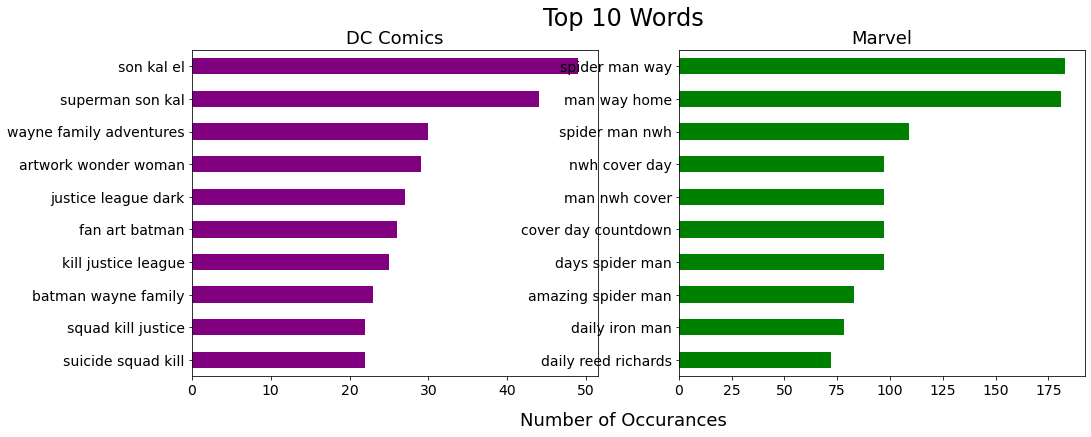

In [43]:
# plot the Most Frequently Occurring Words by subreddit
fig, ax = plt.subplots(1, 2, figsize=(16,6))
dc_cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'Purple', ax=ax[0], fontsize=14)
marvel_cv_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'Green', ax=ax[1], fontsize=14)

ax[0].set_title('DC Comics', fontsize=18)
ax[1].set_title('Marvel', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.01, 'Number of Occurances', 
         ha='center', fontsize=18);
plt.savefig('graphs/top_10_3.png')

In [18]:
# binarize subreddit column 
# 0 for DC comics
# 1 for Marvel 
data['subreddit'] = data['subreddit'].map({'DCcomics': 0, 'Marvel': 1})
data

,title,subreddit,title_length,title_word_count
0,*PLEASE WATCH THE NEW SERIES I PUT UP ON YOUTU...,0,193,36
1,Martian manhunter movie?,0,24,3
2,Concerned is an understatement,0,30,4
3,My witty wife has solved The Batman’s ultimate...,0,55,10
4,Who's more powerful ? Chaos lord or Emotional ...,0,54,9
...,...,...,...,...
19992,|| Captain Marvel-MARVEL Future Revolution || ...,1,75,10
19993,"GALACTUS, THE DEVOURER OF WORLDS by Jack Kirby...",1,61,10
19994,Marvel Class Homework Help?,1,27,4
19995,Marvel Class Homework Help?,1,27,4


In [19]:
# Data Cleaning

# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer('\w+')
# Instantiate Lemmatizer
lemmatizer = WordNetLemmatizer()

# for loop to tokenize, remove stop words, lemmatize posts titles
cleaned = []
for row_number in range(len(data['title'])):
    
    # tokenize title 
    tokenized_data = tokenizer.tokenize(data['title'][row_number].lower())
    # remove stopwords 
    stopwords_removed = [word for word in tokenized_data if word not in stopwords.words('english')]
    #lemmatize words 
    lemmatized_data = [lemmatizer.lemmatize(char) for char in stopwords_removed]
    final = ' '.join(lemmatized_data)
    cleaned.append(final)

In [21]:
# save as new dataframe
cleaned_data = pd.DataFrame({'title':cleaned,'subreddit':data['subreddit']})

# take a look at cleaned data 
cleaned_data.head(25)

In [24]:
# look at if there are any null values 
cleaned_data.isnull().sum()

title        57
subreddit     0
dtype: int64

In [23]:
# replace empty strings with nan
# referenced from https://www.kite.com/python/answers/how-to-replace-each-empty-string-in-a-pandas-dataframe-with-nan-in-python

cleaned_data = cleaned_data.replace(r'^\s*$', np.NaN, regex=True)

# drop nans
cleaned_data = cleaned_data.dropna()

# take a look at shape after nans dropped to make sure 
cleaned_data.shape

In [27]:
# drop duplicates
cleaned_data = cleaned_data.drop_duplicates(subset=['title'])

# save
cleaned_data.to_csv('data/cleaned_subreddit_data.csv', index = False)